# 词嵌入（概念部分）

### 在了解什么是词嵌入之前，我们可以思考一下计算机如何识别人类的输入？  
计算机通过将输入信息解析为0和1这般的二进制编码，从而将人类语言转化为机器语言，进行理解。  
我们先引入一个概念**one-hot编码**，也称为**独热编码**，在给定维度的情况下，一行向量有且仅有一个值为1，例如维度为5的向量[0,0,0,0,1]  
例如，我们在幼儿园或小学学习汉语的时候，首先先识字和词，字和词就会保存在我们的大脑中的某处。<br>

<center><font color=blue>一个小朋友刚学会了四个字和词-->[我] [特别] [喜欢] [学习]</font> </center>   

我们的计算机就可以为小朋友开辟一个词向量维度为4的独热编码   
对于中文 我们先进行分词 我 特别 喜欢 学习  
那么我们就可以令 我->[1 0 0 0] 特别 ->[0 1 0 0] 喜欢->[0 0 1 0] 学习->[0 0 0 1]  
现在给出一句话 我喜欢学习，那么计算机给出的词向量->[1 0 1 1]  
我们可以思考几个问题：  
1.如果小朋友词汇量越学越多，学到了成千上万个词之后，我们使用上述方法构建的词向量就会有非常大的维度，并且是一个稀疏向量。  
2.在中文中 诸如 能 会 可以 这样同义词，我们如果使用独热编码，它们是正交的，缺乏词之间的相似性，很难把他们联系到一起。  
因此我们认为独热编码不是一个很好的词嵌入方法。  

我们再来介绍一下 **稠密表示**  
稠密表示的格式如one-hot编码一致，但数值却不同，如 [0.45,0.65,0.14,1.15,0.97]  

# Bag of Words词袋表示

&emsp; 词袋表示顾名思义，我们往一个袋子中装入我们的词汇，构成一个词袋，当我们想表达的时候，我们将其取出，构建词袋的方法可以有如下形式。

In [8]:
corpus = ["i like reading", "i love drinking", "i hate playing", "i do nlp"]#我们的语料库
word_list = ' '.join(corpus).split()
word_list = list(sorted(set(word_list)))
word_dict = {w: i for i, w in enumerate(word_list)}
number_dict = {i: w for i, w in enumerate(word_list)}

In [9]:
word_dict

{'do': 0,
 'drinking': 1,
 'hate': 2,
 'i': 3,
 'like': 4,
 'love': 5,
 'nlp': 6,
 'playing': 7,
 'reading': 8}

In [10]:
number_dict

{0: 'do',
 1: 'drinking',
 2: 'hate',
 3: 'i',
 4: 'like',
 5: 'love',
 6: 'nlp',
 7: 'playing',
 8: 'reading'}

根据如上形式，我们可以构建一个维度为9的one&-hot编码，如下（除了可以使用np.eye构建，也可以通过sklearn的库调用）

In [20]:
import numpy as np
voc_size = len(word_dict)
bow = []
for i,name in enumerate(word_dict):
    bow.append(np.eye(voc_size)[word_dict[name]])

In [21]:
bow

[array([1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1.])]

# N-gram：基于统计的语言模型
N-gram 模型是一种自然语言处理模型，它利用了语言中词语之间的相关性来预测下一个出现的词语。N-gram 模型通过对一段文本中连续出现的 n 个词语进行建模，来预测文本中接下来出现的词语。比如，如果一个文本中包含连续出现的词语“the cat sat on”，那么 N-gram 模型可能会预测接下来的词语是“the mat”或“a hat”。  

N-gram 模型的精确性取决于用于训练模型的文本的质量和数量。如果用于训练模型的文本包含大量的语言纠错和拼写错误，那么模型的预测结果也可能不准确。此外，如果用于训练模型的文本量较少，那么模型也可能无法充分捕捉到语言中的复杂性。  

**N-gram 模型的优点：**

简单易用，N-gram 模型的概念非常简单，实现起来也很容易。  
能够捕捉到语言中的相关性，N-gram 模型通过考虑连续出现的 n 个词语来预测下一个词语，因此它能够捕捉到语言中词语之间的相关性。  
可以使用已有的语料库进行训练，N-gram 模型可以使用已有的大量语料库进行训练，例如 Google 的 N-gram 数据库，这样可以大大提高模型的准确性。  

**N-gram 模型的缺点：**

对于短文本数据集不适用，N-gram 模型需要大量的文本数据进行训练，因此对于短文本数据集可能无法达到较高的准确性。  
容易受到噪声和语言纠错的影响，N-gram 模型是基于语料库进行训练的，如果语料库中包含大量的语言纠错和拼写错误，那么模型的预测结果也可能不准确。  
无法捕捉到语言中的非线性关系，N-gram 模型假设语言中的关系是线性的，但事实上语言中可能存在复杂的非线性关系，N-gram 模型无法捕捉到这些关系。 

# NNLM：前馈神经网络语言模型
下面通过前馈神经网络模型来**展示滑动**窗口的使用

In [17]:
#导入必要的库
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.autograd import Variable
dtype = torch.FloatTensor

In [19]:
corpus = ["i like reading", "i love drinking", "i hate playing", "i do nlp"]

word_list = ' '.join(corpus).split()
word_list

['i',
 'like',
 'reading',
 'i',
 'love',
 'drinking',
 'i',
 'hate',
 'playing',
 'i',
 'do',
 'nlp']

In [22]:
#构建我们需要的语料库
corpus = ["i like studying", "i love datawhale", "i hate playing", "i do nlp"]

word_list = ' '.join(corpus).split() #将语料库转化为一个个单词 ，如['i', 'like', 'reading', 'i', ...,'nlp']
word_list = list(sorted(set(word_list))) #用set去重后转化为链表
# print(word_list)

word_dict = {w: i for i, w in enumerate(word_list)} #将词表转化为字典 这边是词对应到index
number_dict = {i: w for i, w in enumerate(word_list)}#这边是index对应到词
# print(word_dict)
# print(number_dict)

n_class = len(word_dict) #计算出我们词表的大小，用于后面词向量的构建

m = 2 #词嵌入维度
n_step = 2 #滑动窗口的大小
n_hidden = 2 #隐藏层的维度为2


def make_batch(sentence): #由于语料库较小，我们象征性将训练集按照批次处理 
    input_batch = []
    target_batch = []

    for sen in sentence:
        word = sen.split()
        input = [word_dict[n] for n in word[:-1]]
        target = word_dict[word[-1]]

        input_batch.append(input)
        target_batch.append(target)

    return input_batch, target_batch


class NNLM(nn.Module): #搭建一个NNLM语言模型
    def __init__(self):
        super(NNLM, self).__init__()
        self.embed = nn.Embedding(n_class, m)
        self.W = nn.Parameter(torch.randn(n_step * m, n_hidden).type(dtype))
        self.d = nn.Parameter(torch.randn(n_hidden).type(dtype))

        self.U = nn.Parameter(torch.randn(n_hidden, n_class).type(dtype))
        self.b = nn.Parameter(torch.randn(n_class).type(dtype))

    def forward(self, x):
        x = self.embed(x)  # 4 x 2 x 2
        x = x.view(-1, n_step * m)
        tanh = torch.tanh(self.d + torch.mm(x, self.W))  # 4 x 2
        output = self.b + torch.mm(tanh, self.U)
        return output

model = NNLM()

criterion = nn.CrossEntropyLoss() #损失函数的设置
optimizer = optim.Adam(model.parameters(), lr=0.001) #优化器的设置

input_batch, target_batch = make_batch(corpus) #训练集和标签值
input_batch = Variable(torch.LongTensor(input_batch))
target_batch = Variable(torch.LongTensor(target_batch))

for epoch in range(10000): #训练过程
    optimizer.zero_grad()

    output = model(input_batch)  # input: 4 x 2

    loss = criterion(output, target_batch)

    if (epoch + 1) % 1000 == 0:
        print('epoch:', '%04d' % (epoch + 1), 'cost = {:.6f}'.format(loss.item()))

    loss.backward()
    optimizer.step()

predict = model(input_batch).data.max(1, keepdim=True)[1]#模型预测过程

print([sen.split()[:2] for sen in corpus], '->', [number_dict[n.item()] for n in predict.squeeze()])

epoch: 1000 cost = 1.010682
epoch: 2000 cost = 0.695155
epoch: 3000 cost = 0.597085
epoch: 4000 cost = 0.531892
epoch: 5000 cost = 0.376044
epoch: 6000 cost = 0.118038
epoch: 7000 cost = 0.077081
epoch: 8000 cost = 0.053636
epoch: 9000 cost = 0.038089
epoch: 10000 cost = 0.027224
[['i', 'like'], ['i', 'love'], ['i', 'hate'], ['i', 'do']] -> ['studying', 'datawhale', 'playing', 'nlp']


# Word2Vec模型：主要采用Skip-gram和Cbow两种模式
前文提到的distributed representation稠密向量表达可以用Word2Vec模型进行训练得到。  
skip-gram模型（跳字模型）是用中心词去预测周围词  
cbow模型（连续词袋模型）是用周围词预测中心词  

 11%|█         | 10615/100000 [00:02<00:24, 3657.80it/s]

epoch: 10000 cost = 1.955088


 21%|██        | 20729/100000 [00:05<00:21, 3758.47it/s]

epoch: 20000 cost = 1.673096


 30%|███       | 30438/100000 [00:08<00:18, 3710.13it/s]

epoch: 30000 cost = 2.247422


 41%|████      | 40638/100000 [00:11<00:15, 3767.87it/s]

epoch: 40000 cost = 2.289902


 50%|█████     | 50486/100000 [00:13<00:13, 3713.98it/s]

epoch: 50000 cost = 2.396217


 61%|██████    | 60572/100000 [00:16<00:11, 3450.47it/s]

epoch: 60000 cost = 1.539688


 71%|███████   | 70638/100000 [00:19<00:07, 3809.11it/s]

epoch: 70000 cost = 1.638879


 80%|████████  | 80403/100000 [00:21<00:05, 3740.33it/s]

epoch: 80000 cost = 2.279797


 90%|█████████ | 90480/100000 [00:24<00:02, 3680.03it/s]

epoch: 90000 cost = 1.992100


100%|██████████| 100000/100000 [00:27<00:00, 3677.35it/s]


epoch: 100000 cost = 1.307715


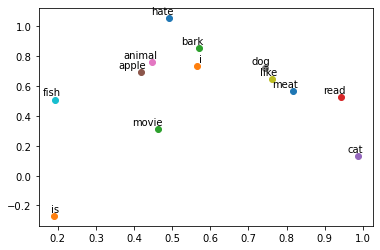

打印


<Figure size 432x288 with 0 Axes>

In [23]:
import torch.nn as nn
import torch.optim as optim
from torch.autograd import variable
import numpy as np
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

dtype = torch.FloatTensor
#我们使用的语料库 
sentences = ['i like dog','i like cat','i like animal','dog is animal','cat is animal',
            'dog like meat','cat like meat','cat like fish','dog like meat','i like apple',
            'i hate apple','i like movie','i like read','dog like bark','dog like cat']



word_sequence = ' '.join(sentences).split() #将语料库的每一句话的每一个词转化为列表 
#print(word_sequence)

word_list = list(set(word_sequence))  #构建我们的词表  
#print(word_list)

#word_voc = list(set(word_sequence)) 

#接下来对此表中的每一个词编号   这就用到了我们之前提到的one-hot编码 

#词典 词对应着编号
word_dict = {w:i for i,w in enumerate(word_list)}
#print(word_dict)
#编号对应着词
index_dict = {i:w for w,i in enumerate(word_list)}
#print(index_dict)


batch_size = 2
voc_size = len(word_list)

skip_grams = []
for i in range(1,len(word_sequence)-1,3):
    target = word_dict[word_sequence[i]] #当前词对应的id
    context = [word_dict[word_sequence[i-1]],word_dict[word_sequence[i+1]]] #两个上下文词对应的id

    for w in context:
        skip_grams.append([target,w])

embedding_size = 10 


class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec,self).__init__()
        self.W1 = nn.Parameter(torch.rand(len(word_dict),embedding_size)).type(dtype)  
        #将词的one-hot编码对应到词向量中
        self.W2 = nn.Parameter(torch.rand(embedding_size,voc_size)).type(dtype)
        #将词向量 转化为 输出   
    def forward(self,x):
        hidden_layer = torch.matmul(x,self.W1)
        output_layer = torch.matmul(hidden_layer,self.W2)
        return output_layer


model = Word2Vec()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=1e-5)

#print(len(skip_grams))
#训练函数

def random_batch(data,size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)),size,replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  #从一个单位矩阵生成one-hot表示
        random_labels.append(data[i][1])
    
    return random_inputs,random_labels

for epoch in tqdm(range(100000)):
    input_batch,target_batch = random_batch(skip_grams,batch_size) # X -> y
    input_batch = torch.Tensor(input_batch)
    target_batch = torch.LongTensor(target_batch)

    optimizer.zero_grad()

    output = model(input_batch)

    loss = criterion(output,target_batch)
    if((epoch+1)%10000==0):
        print("epoch:","%04d" %(epoch+1),'cost =' ,'{:.6f}'.format(loss))

    loss.backward() 
    optimizer.step()

for i , label in enumerate(word_list):
    W1,_ = model.parameters()
    x,y = float(W1[i][0]),float(W1[i][1])
    plt.scatter(x,y)
    plt.annotate(label,xy=(x,y),xytext=(5,2),textcoords='offset points',ha='right',va='bottom')
plt.show()

在自然语言处理领域，常见的评价指标包括以下几种：  

**准确率（Accuracy）**：  
准确率是最简单和常见的评价指标之一，用于度量模型在整体样本集上正确分类的比例。  

**精确率（Precision）和召回率（Recall）**：  
精确率和召回率是用于评估二分类模型性能的指标。精确率指的是模型预测为正例中真正为正例的比例，而召回率指的是真正为正例中被模型预测为正例的比例。  

**F1值（F1-Score）**：  
F1值是精确率和召回率的调和均值，综合了两者的评估结果。F1值越高，代表模型在精确率和召回率之间取得了更好的平衡。  

**混淆矩阵（Confusion Matrix）**：  
混淆矩阵是用于可视化二分类模型性能的矩阵。它将实际类别与模型预测类别的结果进行交叉统计，可以计算出准确率、精确率、召回率等指标。  

**ROC曲线和AUC值（Receiver Operating Characteristic Curve and Area Under Curve）**：    
ROC曲线是以不同的分类阈值为基础，绘制出真正例率（True Positive Rate）和假正例率（False Positive Rate）之间的关系曲线。
AUC值表示ROC曲线下的面积，用于度量模型在不同阈值下的分类性能。  

**BLEU评估（Bilingual Evaluation Understudy）**：  
BLEU评估用于评估机器翻译质量的指标，通过比较候选翻译与参考翻译之间的词语重叠度来计算得分。  

**困惑度（Perplexity）**：  
困惑度常用于语言模型的评估，表示模型对给定序列进行预测的困难程度。困惑度越低，代表模型对输入序列的预测越准确。  

这些评价指标并不是固定的，具体使用哪些指标取决于任务类型和需求。在不同的自然语言处理任务中，还可能会有其他特定的评价指标被使用。  